<img src=https://w-dog.ru/wallpapers/8/16/376431173731531/elka-figurka-zolotaya-shary-krasnye-boke-sneg-prazdniki-novyj-god-rozhdestvo.jpg><br>
<hr style="border: 10px solid green;" />

## <span style="color:green">Финальный комментарий<span>
Спасибо за проделанную работу🤝

Александр, спасибо за доарботки, всё принято👌
    
Желаю дальнейших успехов и новогоднего настроения😎 С Новым годом и наступающим Рождеством, пусть совершится задуманное, отличных встреч и интересных активностей☃️

Поздравляю, проект принят👍

<hr style="border: 2px solid green;" />

## Комментарий ревьювера

Александр, привет! 

🤚Меня зовут, Олег Юрьев, я буду проверять твой проект. Если не против, я буду обращаться к тебе на _ТЫ_ . Если это неприемлемо, обязательно напиши мне в комментариях - мы перейдем на _ВЫ_ .

🤝Спасибо, что сдал проект вовремя. Тобой проделана большая работа, молодец! 

✏️В этой тетрадке ты найдешь мои комментарии.

Комментарии будут выделены:

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа ✅</b><br>
    Безупречная работа</div>       
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить ⚠️</b><br>
    Ничего дорабатывать не надо, данные пункты работают нормально, но есть способы улучшить. Несколько таких комментариев допустимы, но более - придется некоторые доработать. Большое кол-во мелких замечаний и помарок сказываются на общем впечатлении от работы.</div>   
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать ⛔️</b><br>
    Такие пункты необходимо исправить в первую очередь, чтобы я смог принять проект.</div>
 
Не удаляй комментарии, так будем следить за динамикой 📈
   
Давай будем в диалоге - основные цели в диалоге:
- обмен опытом (да я тоже учусь у студентов👨‍🎓)
- выполнить проект еще лучше
- помочь тебе стать аналитиком

Поэтому чтобы мне проще было проверять повторно, а тебе контролировать процесс ревью, оставляй свои комментарии и выделяй их. 
    
<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Например, вот так.</div>
   
Поехали! :)

<hr style="border: 2px solid green;" />

In [1]:
import pandas as pd
import numpy as np

from sqlalchemy import create_engine

In [2]:
path_to_db = '/datasets/telecomm_csi.db'
engine = create_engine(f'sqlite:///{path_to_db}', echo = False)

In [3]:
query = """
WITH
    u AS (SELECT *, 
                    CASE 
                        WHEN lt_day < 365 THEN 'новый клиент'
                        ELSE 'старый клиент'
                    END is_new,
                    CASE
                        WHEN gender_segment = 0 THEN 'мужчина'
                        WHEN gender_segment = 1 THEN 'женщина'
                    END gender_segment,
                    CASE
                        WHEN nps_score = 9 OR nps_score = 10 THEN 'сторонник'
                        WHEN nps_score = 7 OR nps_score = 8 THEN 'нейтрал'
                        ELSE 'критик'
                    END nps_group
    FROM user),
    l AS (SELECT * FROM location),
    a_s AS (SELECT * FROM age_segment),
    ts AS (SELECT * FROM traffic_segment),
    ls AS (SELECT * FROM lifetime_segment)
    
SELECT u.user_id,
       u.lt_day,
       u.is_new,
       u.age,
       u.gender_segment,
       u.os_name,
       u.cpe_type_name,
       l.country,
       l.city,
       SUBSTR(a_s.title, 3) AS age_segment,
       SUBSTR(ts.title, 3) AS traffic_segment,
       SUBSTR(ls.title, 3) AS lifetime_segment,
       u.nps_score,
       u.nps_group
FROM u
JOIN l ON u.location_id = l.location_id
JOIN a_s ON u.age_gr_id = a_s.age_gr_id
JOIN ts ON u.tr_gr_id = ts.tr_gr_id
JOIN ls ON u.lt_gr_id = ls.lt_gr_id
WHERE u.age NOT NULL AND u.gender_segment NOT NULL; 
"""

In [4]:
df = pd.read_sql(query, engine)
df.head(10)

,user_id,lt_day,is_new,age,gender_segment,os_name,cpe_type_name,country,city,age_segment,traffic_segment,lifetime_segment,nps_score,nps_group
0,A001A2,2320,старый клиент,45.0,1.0,ANDROID,SMARTPHONE,Россия,Уфа,45-54,1-5,36+,10,сторонник
1,A001WF,2344,старый клиент,53.0,0.0,ANDROID,SMARTPHONE,Россия,Киров,45-54,1-5,36+,10,сторонник
2,A003Q7,467,старый клиент,57.0,0.0,ANDROID,SMARTPHONE,Россия,Москва,55-64,20-25,13-24,10,сторонник
3,A004TB,4190,старый клиент,44.0,1.0,IOS,SMARTPHONE,Россия,РостовнаДону,35-44,0.1-1,36+,10,сторонник
4,A004XT,1163,старый клиент,24.0,0.0,ANDROID,SMARTPHONE,Россия,Рязань,16-24,5-10,36+,10,сторонник
5,A005O0,5501,старый клиент,42.0,1.0,ANDROID,SMARTPHONE,Россия,Омск,35-44,5-10,36+,6,критик
6,A0061R,1236,старый клиент,45.0,0.0,ANDROID,SMARTPHONE,Россия,Уфа,45-54,10-15,36+,10,сторонник
7,A009KS,313,новый клиент,35.0,0.0,ANDROID,SMARTPHONE,Россия,Москва,35-44,45-50,7-12,10,сторонник
8,A00AES,3238,старый клиент,36.0,1.0,ANDROID,SMARTPHONE,Россия,СанктПетербург,35-44,1-5,36+,10,сторонник
9,A00F70,4479,старый клиент,54.0,1.0,ANDROID,SMARTPHONE,Россия,Волгоград,45-54,15-20,36+,9,сторонник


In [5]:
df.to_csv('\Desktop\telecomm_csi_tableau.csv', index=False)

### Укажите ссылку на дашборд на сайте Tableau Public:

https://public.tableau.com/app/profile/aleksandr3737/viz/Project2_NPS/Dashboard1?publish=yes

### Укажите ссылку на pdf-файл с презентацией:

https://disk.yandex.ru/i/Uk_1qf78S6wKYw

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Презентацию исправил!</div>

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> 

## Общий комментарий
Спасибо за проделанную работу🤝

Александр, ниже комментарии по разделам проекта:
    
**Pipeline**

✅ SQL запрос сформирован корректно. Спасибо, что корректно обработал признак пола и изменил наименования сегментов
    
----------------------
**Dash**

В целом дашборд выполнен хорошо👌
    

💡Улучшения:
- индикатор NPS - я бы исключил фон, его много, а смысла в нем нет
- графики NPS\Кол-во клиентов по возрастуи полу можно попробовать объединить при помощи <a href="https://youtu.be/L2oolkmhKL8">combination plot</a>
- попробуй выбрать лучшее место для фильтров, примеры, куда можно было бы их поместить. Сейчас они находятся в той части дашборда, которая "читается" последней - это ухудшает юзабилити
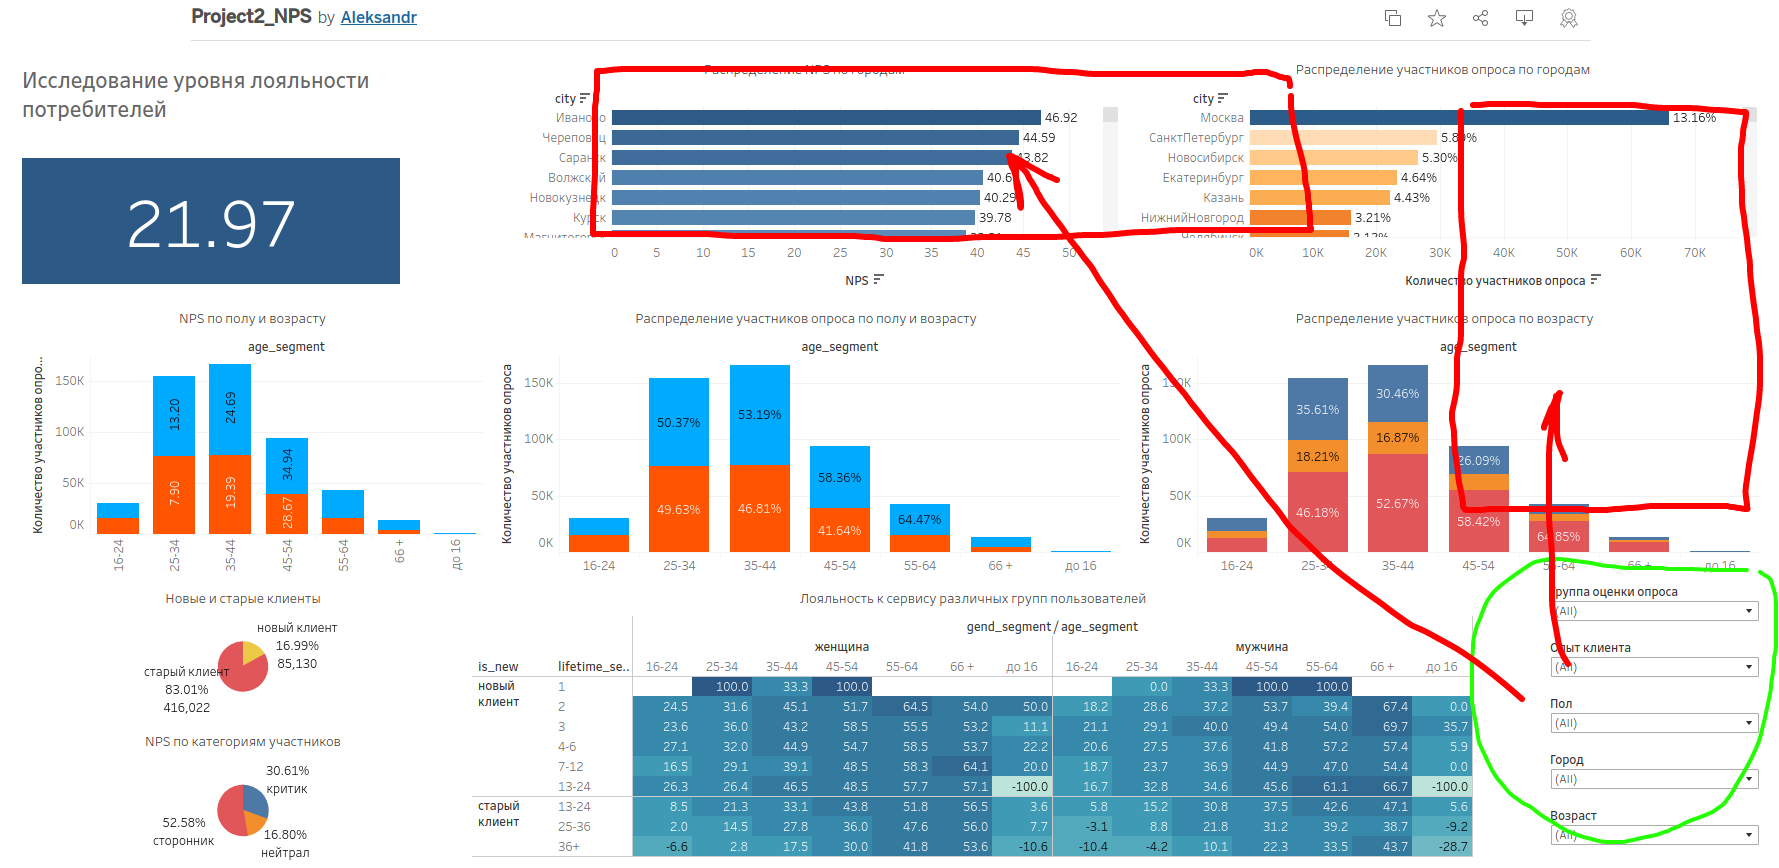
- если графиком по группам по NPS, планировалось показать, как изменяется структура пользователей, то лучше попробовать нормированную столбчатую  [диаграмму](https://tinyurl.com/2loguyn3)
    
----------------------
**Slides**
    
Презентация выполнена отлично, единственное чего не увидел:
- 🔴 ответ на вопрос _Как можно описать клиентов, которые относятся к группе cторонников (англ. promoters)?_ (для памятки сторонник != лояльные группы клиентов)
    


Исправляй и отправляй на проверку🛠

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b>
    Олег, добрый день!
1. Фон исключил
2. Отдельное спасибо за туториал на ютубе - я был приятно удивлен) я поигрался с комбинацией графиков, но конкретно по полу и возрасту с НПС получилость большое нагромождение надписей друг на друга. Поэтому я решил оставить как было. Но это очень полезная штука - взял на вооружение!
3. Поменял положение фильтров.
</div>